In [2]:
# Importing Libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib.inline
plt.style.use('ggplot')
from matplotlib import figure
matplotlib.rcparams['figure.figsize'] = (12,8)

UsageError: Line magic function `%matplotlib.inline` not found.


In [4]:
df = pd.read_csv('movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
## let's see if there is missing values:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [6]:
df = df.dropna()
df.isnull().sum() ### check our code

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [7]:
## datatype of the columns:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   float64
 12  gross     5421 non-null   float64
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 677.6+ KB


In [8]:
## changing columns datatype:
### votes & budget & gross & runtime columns will be converted to int
df['votes'] = df['votes'].astype(int)
df['budget'] = df['budget'].astype(int)
df['gross'] = df['gross'].astype(int)
df['runtime'] = df['runtime'].astype(int)
df.info() # check converting

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   int32  
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   int32  
 12  gross     5421 non-null   int32  
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   int32  
dtypes: float64(1), int32(4), int64(1), object(9)
memory usage: 592.9+ KB


In [9]:
## spliting released to two columns (country, time) 
df[['date_release', 'country_released']] = df.released.str.split("(", expand = True)
df['country_released'] = df['country_released'].str[:-1]     ## to remove the closing parenthesis
df.head()     ## checking the code and it's OK

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date_release,country_released
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,"June 13, 1980",United States
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,"July 2, 1980",United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,"June 20, 1980",United States
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,"July 2, 1980",United States
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,"July 25, 1980",United States


In [10]:
### checking for duplicates:
df.duplicated().sum()

0

C:\Users\Heisenberg\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:49: RuntimeWarning: overflow encountered in long_scalars
  rdelta_ext = (rmax_ - rmin_) * range_padding / 2.0


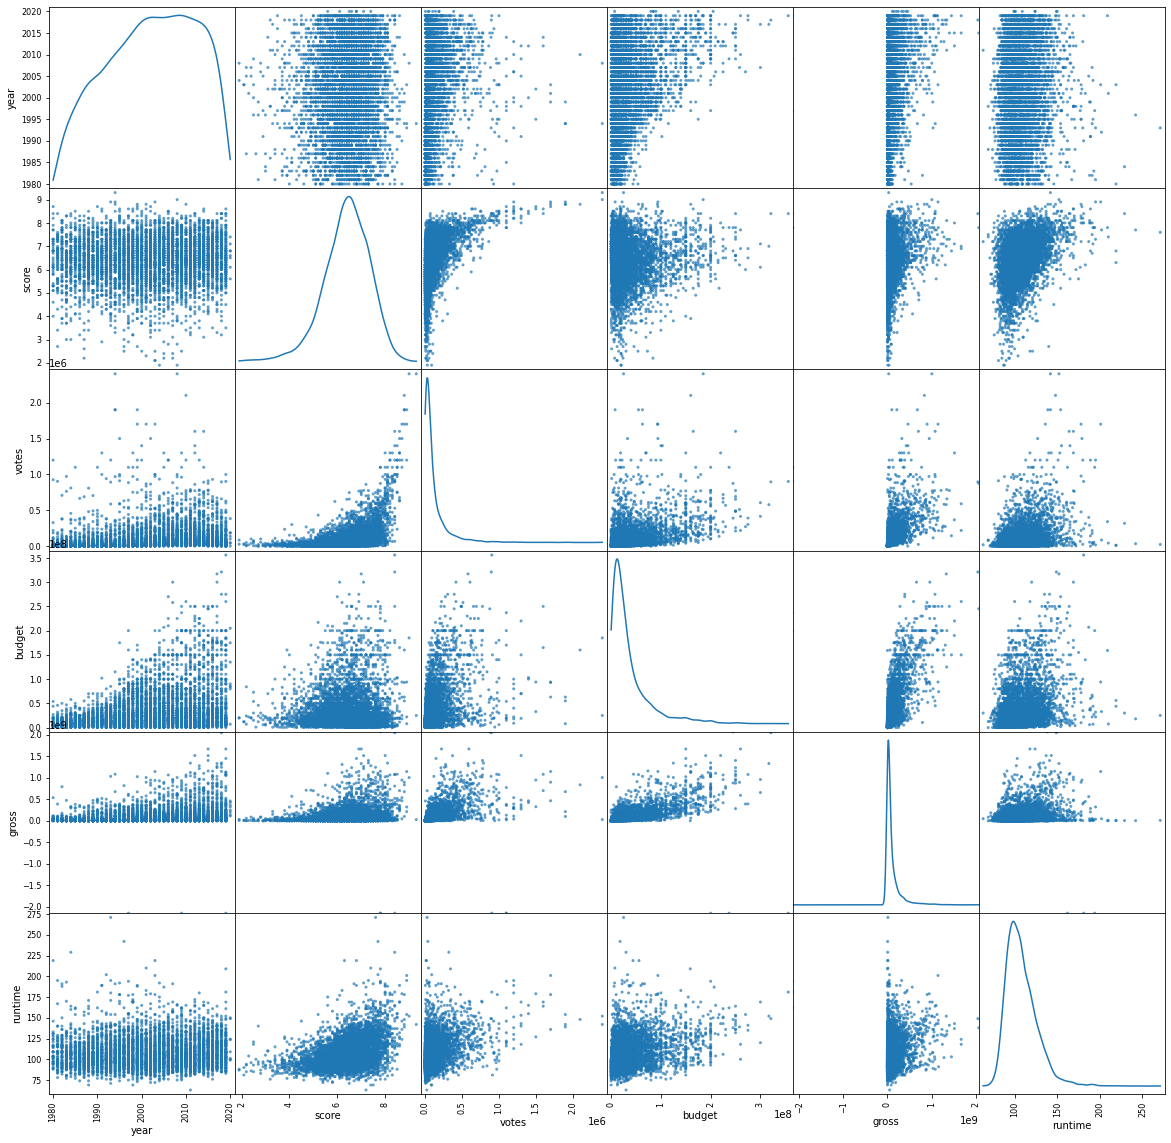

In [11]:
pd.plotting.scatter_matrix(df, alpha = 0.7, figsize = (20, 20), diagonal = 'kde');

In [12]:
df.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.267631,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.201086,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.550649,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.669203,0.318695
gross,0.267631,0.201086,0.550649,0.669203,1.000000,0.223667
runtime,0.075077,0.414068,0.352303,0.318695,0.223667,1.000000


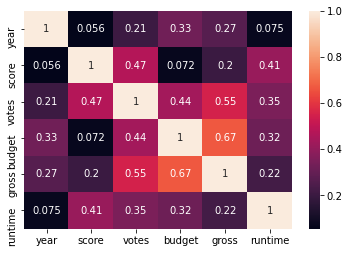

In [13]:
sb.heatmap(df.corr(), annot = True);

In [14]:
df_num = df
for col in df_num.columns:
    if df_num[col].dtype == 'object':
        df_num[col] = df_num[col].astype('category')
        df_num[col] = df_num[col].cat.codes
        
df_num.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date_release,country_released
0,4692,6,6,1980,1304,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146,1239,47
1,3929,6,1,1980,1127,5.8,65000,1578,1158,214,47,4500000,58853106,452,104,1065,47
2,3641,4,0,1980,1359,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124,1288,47
3,204,4,4,1980,1127,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88,1065,47
4,732,6,4,1980,1170,7.3,108000,719,351,271,47,6000000,39846344,1083,98,1108,47
5,1509,6,9,1980,1922,6.4,123000,1758,3081,155,47,550000,39754601,1108,95,1814,47
6,3930,6,0,1980,1359,7.9,188000,974,576,860,47,27000000,115229890,1397,133,1288,47
7,3122,6,3,1980,530,8.2,330000,1269,1257,1469,47,18000000,23402427,390,129,499,47
8,3732,4,0,1980,1346,6.8,101000,1606,1402,595,47,54000000,108185706,548,127,1276,47
9,4401,6,3,1980,1755,7.0,10000,2011,280,402,47,10000000,15795189,1391,100,1657,47


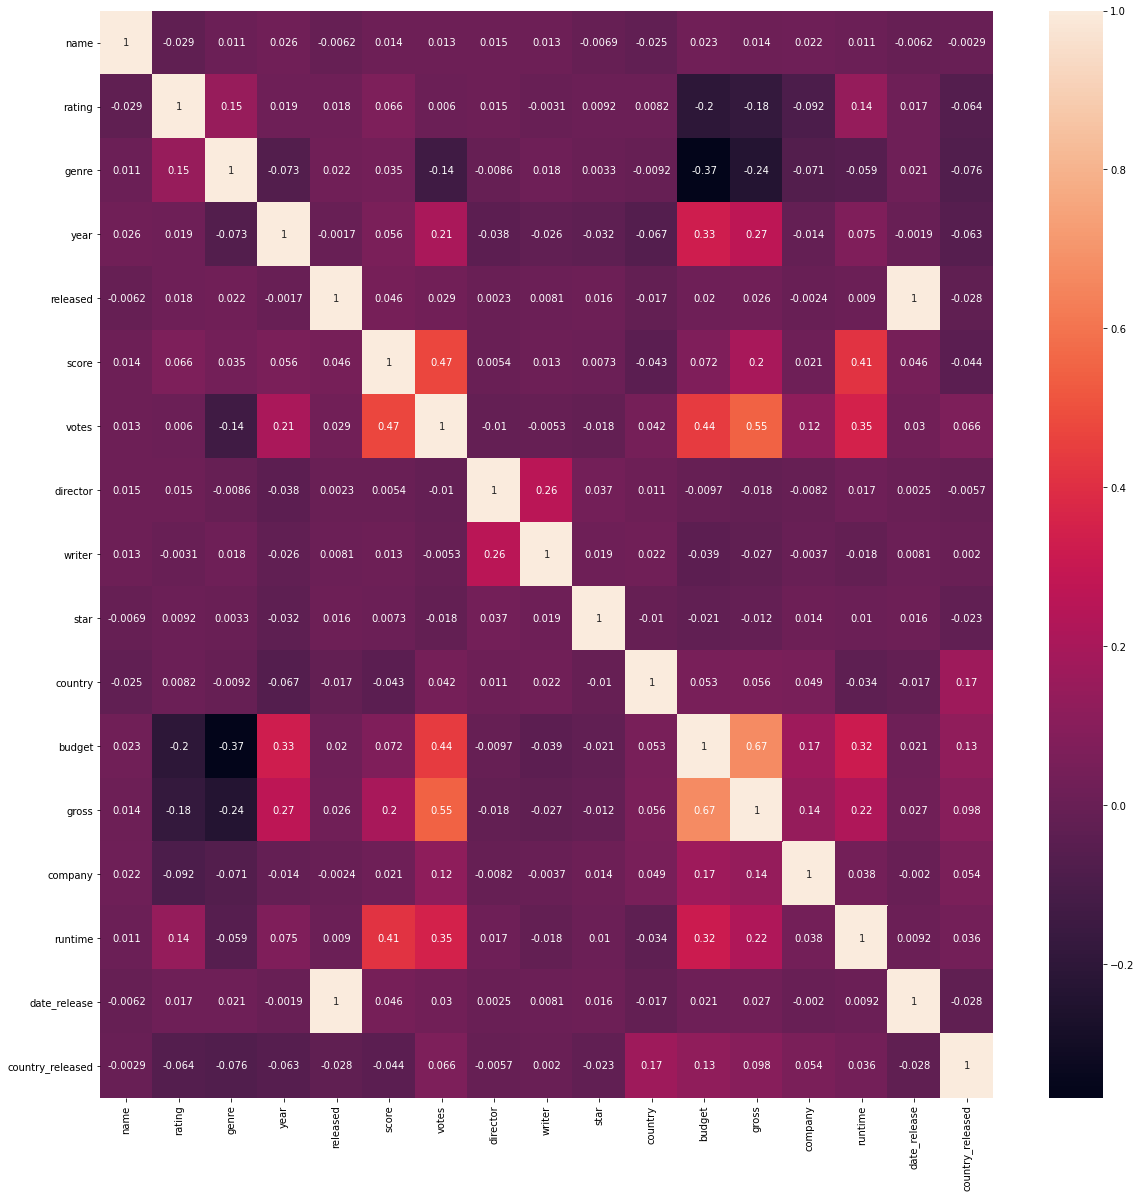

In [15]:
df_num.corr()
fig, ax = plt.subplots(figsize=(20,20))
sb.heatmap(df_num.corr(), annot = True);

# the highest correlation is between Gross and Budget